# Vegan Food Sentiment Analysis

In [176]:
#!pip install tweepy --user

In [177]:
#!pip install nltk --user

In [178]:
import tweepy # Twitter API
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Image

In [179]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [180]:
%run ./keys.ipynb # run the file for getting API Keys

In [181]:
auth = tweepy.OAuthHandler(API_key,API_key_secret) 
auth.set_access_token(Access_token,Access_token_secret)
api = tweepy.API(auth)

In [182]:
CN_lat = 60.36414   # Fort Smith, NT (NorthWest Territories)
CN_long= -123.2145
CN_max_range = 5000
CN = "Canada"

US_lat = 39.8283    # Kansas, USA
US_long= -98.5795
US_max_range = 500
US = "US"


IN_lat = 21.7679    # Bhairopani, Madhya Pradesh, India
IN_long= 78.8718
IN_max_range = 500
IN = "India"


#UK_lat = 53.14346   # Morton, UK
#UK_long = -1.38804
#UK_max_range = 500
#UK = "UK"

data = []

In [183]:
# get the tweets accrding to country and Vegan food

def get_tweet(lat, long, max_range, loc):
    
    tweet = tweepy.Cursor(api.search_tweets,
                   q=["vegan" or "Vegan" or "VEGAN" and "food", "diet"],
                   geocode = "%f,%f,%dkm" % (lat, long, max_range),
                   lang="en").items(5000)
    for i in tweet:
        data.append([i.created_at, i.id, i.user.screen_name,i.text, i.favorite_count, i.retweet_count, i.lang,
                     i.user.location, loc]) 

In [184]:
get_tweet(CN_lat, CN_long, CN_max_range, CN)
get_tweet(US_lat, US_long, US_max_range, US)
get_tweet(IN_lat, IN_long, IN_max_range, IN)
#get_tweet(UK_lat, UK_long, UK_max_range, UK)

In [185]:
col = ["Date_and_Time", "Tweet_Id", "User", "Tweet", "Like_Count", "Retweet_Count", "Lang", "Location","Country"]
df = pd.DataFrame(data, columns=col)

In [186]:
df

Date_and_Time             Tweet_Id             User  \
0   2022-08-19 21:01:01+00:00  1560733596528168960    AlWednesday69   
1   2022-08-18 01:58:02+00:00  1560083569736683520          yekdeli   
2   2022-08-17 19:42:52+00:00  1559989157262393345   susieheitmann1   
3   2022-08-17 02:33:20+00:00  1559730065713385472    NurseCanadian   
4   2022-08-17 00:16:03+00:00  1559695516988067841    NurseCanadian   
5   2022-08-16 15:47:39+00:00  1559567571950915584    NurseCanadian   
6   2022-08-16 12:49:35+00:00  1559522760120041472    NurseCanadian   
7   2022-08-16 12:45:34+00:00  1559521752341917696    NurseCanadian   
8   2022-08-15 22:26:58+00:00  1559305678740660229      Mazikeen350   
9   2022-08-15 22:26:58+00:00  1559305677004234752      Mazikeen350   
10  2022-08-15 18:15:05+00:00  1559242289922248705   tprimesubprime   
11  2022-08-15 16:46:12+00:00  1559219921074245632   justvegantoday   
12  2022-08-15 12:02:17+00:00  1559148471600414720    NurseCanadian   
13  2022-08-14 19:48:58+00:00  1558903526746574848    NurseCanadian   
14  2022-08-14 19:46:08+00:00  1558902813668904961  healthstepsonly   
15  2022-08-14 09:25:38+00:00  1558746658854166533    AlWednesday69   
16  2022-08-13 13:50:00+00:00  1558450804016791554      Hephaestus7   
17  2022-08-13 12:55:39+00:00  1558437122448703489      Saratoninxo   
18  2022-08-12 22:17:12+00:00  1558216053519425538     KarlyThomas2   
19  2022-08-12 21:40:22+00:00  1558206787693621248    NurseCanadian   
20  2022-08-12 19:09:54+00:00  1558168921663946752       criavolver   
21  2022-08-11 15:24:25+00:00  1557749787654488065    NurseCanadian   
22  2022-08-11 15:20:59+00:00  1557748922881380352    NurseCanadian   
23  2022-08-11 12:37:25+00:00  1557707759641972736       Finished44   
24  2022-08-11 03:42:06+00:00  1557573044998135809       onwardMaya   
25  2022-08-19 20:39:42+00:00  1560728234412720128        thelink83   
26  2022-08-19 17:28:43+00:00  1560680171874705410        brick9778   
27  2022-08-19 13:37:22+00:00  1560621949621080064  HealthN56098434   
28  2022-08-19 09:27:25+00:00  1560559048402997249    LokAp44129615   
29  2022-08-19 07:47:51+00:00  1560533990037196801          NitaFsa   
30  2022-08-19 07:34:05+00:00  1560530528473944064   Juiceplusbetty   
31  2022-08-19 07:13:26+00:00  1560525329793433601   weigthlossfast   
32  2022-08-19 04:47:09+00:00  1560488515665788928  ChicagoPlantEat   
33  2022-08-19 04:10:05+00:00  1560479190327050240   DiversityShope   
34  2022-08-19 00:27:16+00:00  1560423113682198531         Reerun83   
35  2022-08-18 20:12:27+00:00  1560358986649591809  michael_pacetti   
36  2022-08-18 20:08:40+00:00  1560358035201167362        skye_1444   
37  2022-08-18 18:47:11+00:00  1560337528204546048  ChicagoPlantEat   
38  2022-08-18 17:55:16+00:00  1560324462804975618  OrganicLiveFood   
39  2022-08-18 16:54:53+00:00  1560309269073133569  OrganicLiveFood   
40  2022-08-18 16:10:15+00:00  1560298034772180994   MeatlessMonday   
41  2022-08-18 13:47:09+00:00  1560262023556247555  ChicagoPlantEat   
42  2022-08-18 13:45:12+00:00  1560261534408142850      RobotPeston   
43  2022-08-18 13:15:18+00:00  1560254007498637312  Alejand22773709   
44  2022-08-18 08:47:11+00:00  1560186533298274304  ChicagoPlantEat   
45  2022-08-18 02:17:03+00:00  1560088354351448064       rc_tullius   
46  2022-08-18 01:57:34+00:00  1560083451805683713       RUMBLELORD   
47  2022-08-17 19:47:10+00:00  1559990238990286848  ChicagoPlantEat   
48  2022-08-17 18:12:50+00:00  1559966498650718211       rc_tullius   
49  2022-08-17 17:47:11+00:00  1559960044246106114  ChicagoPlantEat   
50  2022-08-17 15:04:14+00:00  1559919036288454657      FpPernalete   
51  2022-08-17 13:30:47+00:00  1559895515722129409   JohnAmericaUSA   
52  2022-08-16 22:06:08+00:00  1559662821952167937       elliotsemi   
53  2022-08-16 20:42:34+00:00  1559641793485996032   Anarchitect918   
54  2022-08-16 20:16:22+00:00  1559635198509187077   Anarchitect918   
55  2022-08-16 19:19:28+00:00  155962087

In [187]:
df["User"] = df.User.astype("string")
df["Tweet"] = df.Tweet.astype("string")
df["Lang"] = df.Lang.astype("string")
df["Location"] = df.Location.astype("string")
df["Country"] = df.Country.astype('category') 

In [188]:
df.dtypes

Date_and_Time    datetime64[ns, UTC]
Tweet_Id                       int64
User                          string
Tweet                         string
Like_Count                     int64
Retweet_Count                  int64
Lang                          string
Location                      string
Country                     category
dtype: object

In [189]:
df.Tweet.duplicated().sum()

6

In [190]:
df.drop_duplicates('Tweet', keep='last', inplace=True) # remove duplicate tweets 

In [191]:
df.Tweet.duplicated().sum()

0

In [192]:
dt = datetime.now().strftime("%Y_%m_%d-%H-%M-%S_%p")

In [193]:
dt

'2022_08_19-17-16-53_PM'

In [194]:
df.to_csv(f"C:\\Users\\Neha\\Downloads\\\Vegan\\Data\\vegan_data_{dt}.csv") # to write the data into csv file with date and timestamp

# Data Preprocessing

Data preprocessing steps:

1. Cleaning the text
2. Tokenization
3. Enrichment – POS tagging
4. Stopwords removal
5. Obtaining the Lemma words

## To clean the twitter's tweets

In [195]:
# NLTK Sentiment Analysis Package : https://www.nltk.org/api/nltk.sentiment.html
#The NLTK library contains various utilities that allow you to effectively manipulate and analyze linguistic data.

import nltk # nltk(Natural Language Toolkit) Library to work with human language data

In [196]:
# to download specific resources directly from particular library
# NLTK to find and download each resource based on its identifier


# nltk.download('stopwords') 
# nltk.download('wordnet')

In [197]:
from nltk.corpus import stopwords 
# Wordnet is a lexical database for the English language that helps the script determine the base word. 
import re as re 
# Regular expression Library : Both patterns and strings to be 
#searched can be Unicode strings (str) as well as 8-bit strings (bytes). :: https://docs.python.org/3/library/re.html#module-re
#1. Hyperlinks - All hyperlinks in Twitter are converted to the URL shortener t.co. 
    # Therefore, keeping them in the text processing would not add any value to the analysis.
#2. Twitter handles in replies - These Twitter usernames are preceded by a @ symbol, 
    # which does not convey any meaning.
#3. Punctuation and special characters - While these often provide context to textual data, 
    # this context is often difficult to process. 
    # For simplicity, you will remove all punctuation and special characters from tweets.


# Define a function to clean the text

In [198]:
# Handling the data clean part using below user defined function 
def clean(text):
    text = re.sub("@[A-Za-z0-9_]+","", text) # Removing mentions
    text = re.sub("#[A-Za-z0-9_]+","", text) # Removing hashtags
    text = re.sub(r"http\S+", "", text) # Removing links
    text = re.sub(r"www.\S+", "", text) # Removing links
    text = re.sub('[()!?]', '', text) # Removing punctuations/Special Characters
    text = re.sub('\[.*?\]','', text) # Removing punctuations/Special Characters
    text = re.sub("[^A-Za-z0-9 \t]","", text) # Filtering non-alphanumeric characters if incase something still persists
    text = re.sub("\d+","", text) # Removing digits e.g. 1000x, 100p
    return text

In [199]:
# Cleaning the text in the review column

df['Cleaned_Tweets'] = df['Tweet'].apply(clean) 

In [200]:
df['Cleaned_Tweets'] = df['Cleaned_Tweets'].apply(lambda x: ','.join([w for w in x.split() if len(w)>3]))

In [201]:
#df["Cleaned_Tweets"]

In [202]:
# Finding the white space row from dataframe and replacing it with NaN values

df["Cleaned_Tweets"] = df["Cleaned_Tweets"].apply(lambda x: np.nan if (re.search("^\s*$", x)) else x)

In [203]:
# convert into lower case
df["Cleaned_Tweets"] = df["Cleaned_Tweets"].str.lower()

In [204]:
df.isnull().sum()

Date_and_Time     0
Tweet_Id          0
User              0
Tweet             0
Like_Count        0
Retweet_Count     0
Lang              0
Location          0
Country           0
Cleaned_Tweets    1
dtype: int64

In [205]:
df[["Cleaned_Tweets", "Tweet"]]

Cleaned_Tweets  \
0          durrrrrthis,isnt,gotcha,think,realize,least   
1                    stent,radically,changed,diet,they   
2              does,food,that,affect,overall,wellbeing   
3           youre,against,processed,vegan,alternatives   
4              told,theres,difference,please,enlighten   
5                             asking,looking,copy,diet   
6    plant,based,processed,garbagemy,diet,consists,...   
7    there,plenty,vegan,bodybuilders,athletes,dont,...   
8    feed,your,vegan,diet,youll,with,trouble,best,e...   
9    many,flaws,this,study,that,canines,carnivores,...   
10   which,diet,will,help,save,planet,climatarian,f...   
11                        common,supplements,vegandiet   
12                              said,specifically,that   
13     gosh,inventive,original,promise,that,vegan,diet   
14          doctor,writes,book,recipes,plantbased,diet   
15   block,people,prove,wrong,keep,open,mind,they,w...   
16   which,diet,will,help,save,planet,climatarian,f...   
17   dont,study,nutritionthey,just,tell,take,this,p...   
18   most,vegans,need,supplements,their,vegan,diets...   
19   show,where,said,that,thought,other,changes,wer...   
20   cold,soba,noodle,salad,vegan,fixation,meal,for...   
21   lmfao,really,antivegan,youtube,channel,thats,w...   
22   have,masters,nutrition,nurse,practitioner,married   
23    this,child,literally,puppet,control,freak,mother   
24   late,night,vegan,donuts,because,totally,going,...   
25                                          vegan,diet   
26   used,hclf,vegan,inflamed,obese,miserable,alway...   
27               tips,losing,weight,vegan,diet,vegnews   
28   apple,cider,vinegar,capsules,plus,keto,burner,...   
29   menopause,focus,eating,real,food,avoid,midlife...   
30             does,food,that,affect,overall,wellbeing   
31   menopause,focus,eating,real,food,avoid,midlife...   
32   vibrant,colors,represent,wide,array,vitamins,m...   
33   menopause,focus,eating,real,food,avoid,midlife...   
34   wonders,only,lost,pounds,after,month,vegan,die...   
35        that,wouldnt,mesh,with,vegan,when,wants,diet   
36   yada,same,dude,forth,idea,that,whole,food,vega...   
38   more,plant,based,despite,trillion,year,govenme...   
39   destroyed,sacred,messengers,encourage,take,bet...   
40   picnic,starts,hour,what,learn,pasta,salad,with...   
41   more,studyinflammation,markers,down,just,coupl...   
42   coppers,guards,stroked,knee,such,tell,that,pos...   
43            vegan,diet,diabetes,tips,benefits,safety   
44   great,interview,williams,caldwell,esselstyn,bo...   
45   everyone,apply,vegan,principle,everyone,work,l...   
46   heck,vegan,diet,makes,difference,because,dairy...   
48         veganism,moral,position,extends,beyond,just   
49   real,health,movement,growing,whether,your,heal...   
50          much,does,eating,affect,nations,veganplant   
51   authorized,consumption,himself,along,with,anim...   
52   things,love,that,highlevel,wrestler,being,voca...   
53   vegans,have,varying,definitions,what,constitut...   
54   most,some,humans,very,much,some,have,condition...   
55   hard,change,habits,that,weve,years,switching,v...   
56   commentary,which,diet,will,help,save,planet,cl...   
57   great,interview,williams,caldwell,esselstyn,bo...   
58                 your,body,reflection,your,lifestyle   
59   eating,plant,based,plan,your,meals,snacks,dont...   
60   vibrant,colors,represent,wide,array,vitamins,m...   
61   being,dismissive,just,cant,think,could,achieve...   
62   want,become,vegan,thats,great,remember,veganis...   
64   owner,daily,mail,viscount,rothermere,tells,tha...   
65   more,studyinflammation,markers,down,just,coupl...   
66   whole,world,went,vegan,would,save,nearly,billi...   
67   edamame,grain,vegan,burgers,sharon,palmer,plan...   
68   according,plantbased,physician,mills,what,affe...   
69   whole,foods,cofounder,john,mackey,history,comp...   
71   real,health,movement,growing,whether,your,heal...   
72          seefood,diet,food,includin

In [206]:
df.dropna(inplace = True) # Dropping the na values

In [207]:
df.reset_index() # Reindexing the dataframe

index             Date_and_Time             Tweet_Id             User  \
0        0 2022-08-19 21:01:01+00:00  1560733596528168960    AlWednesday69   
1        1 2022-08-18 01:58:02+00:00  1560083569736683520          yekdeli   
2        2 2022-08-17 19:42:52+00:00  1559989157262393345   susieheitmann1   
3        3 2022-08-17 02:33:20+00:00  1559730065713385472    NurseCanadian   
4        4 2022-08-17 00:16:03+00:00  1559695516988067841    NurseCanadian   
5        5 2022-08-16 15:47:39+00:00  1559567571950915584    NurseCanadian   
6        6 2022-08-16 12:49:35+00:00  1559522760120041472    NurseCanadian   
7        7 2022-08-16 12:45:34+00:00  1559521752341917696    NurseCanadian   
8        8 2022-08-15 22:26:58+00:00  1559305678740660229      Mazikeen350   
9        9 2022-08-15 22:26:58+00:00  1559305677004234752      Mazikeen350   
10      10 2022-08-15 18:15:05+00:00  1559242289922248705   tprimesubprime   
11      11 2022-08-15 16:46:12+00:00  1559219921074245632   justvegantoday   
12      12 2022-08-15 12:02:17+00:00  1559148471600414720    NurseCanadian   
13      13 2022-08-14 19:48:58+00:00  1558903526746574848    NurseCanadian   
14      14 2022-08-14 19:46:08+00:00  1558902813668904961  healthstepsonly   
15      15 2022-08-14 09:25:38+00:00  1558746658854166533    AlWednesday69   
16      16 2022-08-13 13:50:00+00:00  1558450804016791554      Hephaestus7   
17      17 2022-08-13 12:55:39+00:00  1558437122448703489      Saratoninxo   
18      18 2022-08-12 22:17:12+00:00  1558216053519425538     KarlyThomas2   
19      19 2022-08-12 21:40:22+00:00  1558206787693621248    NurseCanadian   
20      20 2022-08-12 19:09:54+00:00  1558168921663946752       criavolver   
21      21 2022-08-11 15:24:25+00:00  1557749787654488065    NurseCanadian   
22      22 2022-08-11 15:20:59+00:00  1557748922881380352    NurseCanadian   
23      23 2022-08-11 12:37:25+00:00  1557707759641972736       Finished44   
24      24 2022-08-11 03:42:06+00:00  1557573044998135809       onwardMaya   
25      25 2022-08-19 20:39:42+00:00  1560728234412720128        thelink83   
26      26 2022-08-19 17:28:43+00:00  1560680171874705410        brick9778   
27      27 2022-08-19 13:37:22+00:00  1560621949621080064  HealthN56098434   
28      28 2022-08-19 09:27:25+00:00  1560559048402997249    LokAp44129615   
29      29 2022-08-19 07:47:51+00:00  1560533990037196801          NitaFsa   
30      30 2022-08-19 07:34:05+00:00  1560530528473944064   Juiceplusbetty   
31      31 2022-08-19 07:13:26+00:00  1560525329793433601   weigthlossfast   
32      32 2022-08-19 04:47:09+00:00  1560488515665788928  ChicagoPlantEat   
33      33 2022-08-19 04:10:05+00:00  1560479190327050240   DiversityShope   
34      34 2022-08-19 00:27:16+00:00  1560423113682198531         Reerun83   
35      35 2022-08-18 20:12:27+00:00  1560358986649591809  michael_pacetti   
36      36 2022-08-18 20:08:40+00:00  1560358035201167362        skye_1444   
37      38 2022-08-18 17:55:16+00:00  1560324462804975618  OrganicLiveFood   
38      39 2022-08-18 16:54:53+00:00  1560309269073133569  OrganicLiveFood   
39      40 2022-08-18 16:10:15+00:00  1560298034772180994   MeatlessMonday   
40      41 2022-08-18 13:47:09+00:00  1560262023556247555  ChicagoPlantEat   
41      42 2022-08-18 13:45:12+00:00  1560261534408142850      RobotPeston   
42      43 2022-08-18 13:15:18+00:00  1560254007498637312  Alejand22773709   
43      44 2022-08-18 08:47:11+00:00  1560186533298274304  ChicagoPlantEat   
44      45 2022-08-18 02:17:03+00:00  1560088354351448064       rc_tullius   
45      46 2022-08-18 01:57:34+00:00  1560083451805683713       RUMBLELORD   
46      48 2022-08-17 18:12:50+00:00  1559966498650718211       rc_tullius   
47      49 2022-08-17 17:47:11+00:00  1559960044246106114  ChicagoPlantEat   
48      50 2022-08-17 15:04:14+00:00  1559919036288454657      FpPernalete   
49      51 2022-08-17 13:30:47+00:00  1559895515722129409   JohnAmericaUSA   
50      52 2022-08-16 22:06

In [208]:
df = df.reset_index(drop=True) # Dropping the reindexing column

In [209]:
df.isnull().sum()

Date_and_Time     0
Tweet_Id          0
User              0
Tweet             0
Like_Count        0
Retweet_Count     0
Lang              0
Location          0
Country           0
Cleaned_Tweets    0
dtype: int64

In [210]:
df[["Tweet", "Cleaned_Tweets"]]

Tweet  \
0    @Acalmbitchwitha @queenpythia Durrrrr…

This i...   
1    @RamblinRosen @StacyKozak @danaparish @LewisNo...   
2    How does the food that we eat affect our overa...   
3    @null_syll @CheezeKitsune @dongfangbubaiz1 @De...   
4    @Desphi @CheezeKitsune @Sinister_Sophia @dongf...   
5    @hawkstone444 @GeorgeMonbiot @1GarethWynJones ...   
6    @ArnottsPerspec1 @protoxproto " Plant based is...   
7    @mattardcreative @ToolyTheKing @globeandmail T...   
8    You feed your dog a vegan diet, you’ll end up ...   
9    So many flaws in this study, who did that?? Ca...   
10   Which diet will help save our planet: Climatar...   
11   Common Supplements For A Vegan Diet https://t....   
12   @PossiblyKPerry @TheVeganDragon_ @TotallyNotBr...   
13   @OhSnapOneUp @cyt0sis @pinkblooming_ @ppaIgaen...   
14   Doctor writes book of recipes for a plant-base...   
15   @BoredisSam @ElfJTrul You block people who pro...   
16   Which diet will help save our planet: climatar...   
17   @DrFarazHarsini Drs don't study nutrition..the...   
18   Most vegans need supplements on top of their v...   
19   @Sinister_Sophia Can you show me where I said ...   
20   Cold Soba Noodle salad is my vegan fixation me...   
21   @AsarCadyn @thiscaitcan @KenDBerryMD lmfao, re...   
22   @AsarCadyn @thiscaitcan @KenDBerryMD I have a ...   
23   @CyclicalSnek @chewdoor @KeinDing123 @DiogodaC...   
24   Late night vegan donuts, because I'm totally g...   
25              The Vegan Diet https://t.co/mV5LsLOMIt   
26   @TrenSensie219 @TheMFingCOO I used to be a HCL...   
27   6 Tips for Losing Weight on a Vegan Diet – Veg...   
28   Apple Cider Vinegar Capsules Plus Keto BHB | F...   
29   Menopause: Focus on eating 'real food' and avo...   
30   How does the food that we eat affect our overa...   
31   Menopause: Focus on eating 'real food' and avo...   
32   Vibrant colors represent the wide array of vit...   
33   Menopause: Focus on eating 'real food' and avo...   
34   ::wonders why I’ve only lost 5 pounds after a ...   
35   @EmmanuelBrion @PetrosAndMoney That wouldn't m...   
36   @menwritewomen Yada is the same dude who put f...   
37   Eat more plant based #diet: https://t.co/DX6kU...   
38   #Symptoms are not #enemies to be destroyed, bu...   
39   The picnic starts in an hour. So what do you d...   
40   One more study...inflammation markers down in ...   
41   One of the coppers who guards No.10 stroked my...   
42   Vegan diet for diabetes: Tips, benefits and sa...   
43   Great interview of Drs Kim Williams &amp; Cald...   
44   @UnfilteredWMD Everyone can apply the vegan pr...   
45   @AlyoshaK_ @joshgad @DEADLINE Heck yes!  A veg...   
46   @flangeworthy @baldmosher @amcey3 @footienut1 ...   
47   The REAL Health Movement is growing!  Whether ...   
48   How much does eating #meat affect nations’ #gr...   
49   @ElliotPinus @SBakerMD authorized for consumpt...   
50   2 things:

- I love that a high-level pro wres...   
51   @anarchoautie @anarchoboognish Vegans have var...   
52   @anarchoautie @anarchoboognish Most do not, bu...   
53   It can be hard to change habits that we've had...   
54   Commentary: Which diet will help save our plan...   
55   Great interview of Drs Kim Williams &amp; Cald...   
56   Your body is a reflection of your lifestyle: h...   
57   Tip #3 for eating plant based: plan your meals...   
58   Vibrant colors represent the wide array of vit...   
59   @skepticalbutch @anarchoboognish I'm not being...   
60   @bleiben_2 @poopycarrot @veganseatherich You w...   
61   The owner of the Daily Mail, Viscount Rotherme...   
62   One more study...inflammation markers down in ...   
63   If the whole world went vegan it would save ne...   
64   Edamame Grain Vegan Burgers – Sharon Palmer, T...   
65   According to plant-based physician Dr. Mills w...   
66   Whole Foods cofounder John Mackey has a histor...   
67   The REAL Health Movement is growing!  Whether ...   
68   @dmrachnik I'm on a see-food diet.   I see

## Tokenization

Splitting strings into smaller parts called tokens.

A token is a sequence of characters in text that serves as a unit. Based on how you create the tokens, they may consist of words, emoticons, hashtags, links, or even individual characters.

A basic way of breaking language into tokens is by splitting the text based on whitespace and punctuation.

In [211]:
from nltk.tokenize import word_tokenize

In [212]:
df["Cleaned_Tweets"]

clean_tweets = df["Cleaned_Tweets"]

tokens = word_tokenize(clean_tweets[0])

tokens

tweet_count = df["Cleaned_Tweets"].count()

tweet_count

143

## POS tagging

POS (Part of Speech) : Used to tagging parts of speech to each word of a given text such as nouns, verb, pronouns, adverbs based on definitation and its context.

In [213]:
from nltk.tag import pos_tag

pos = nltk.pos_tag(tokens)

pos

[('durrrrrthis', 'NN'),
 (',', ','),
 ('isnt', 'NN'),
 (',', ','),
 ('gotcha', 'NN'),
 (',', ','),
 ('think', 'VB'),
 (',', ','),
 ('realize', 'VB'),
 (',', ','),
 ('least', 'JJS')]

## Stopwords removal


    NNP: Noun, proper, singular
    NN: Noun, common, singular or mass
    IN: Preposition or conjunction, subordinating
    VBG: Verb, gerund or present participle
    VBN: Verb, past participle


In [214]:
from nltk.corpus import wordnet

In [215]:
print(stopwords.words('english')) # display the stopwords in the English language.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [216]:
# POS tagger dictionary with whole dataset

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):  
    
# token_stop_pos is the function that takes the text and performs tokenization, removes stopwords, 
# and tags the words to their POS.

    tags = pos_tag(word_tokenize(text))
    newlist = []
    
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [217]:
df['POS_tagged'] = df["Cleaned_Tweets"].apply(token_stop_pos)

In [218]:
df['POS_tagged']

0      [(durrrrrthis, n), (,, None), (isnt, n), (,, N...
1      [(stent, n), (,, None), (radically, r), (,, No...
2      [(,, None), (food, n), (,, None), (,, None), (...
3      [(youre, n), (,, None), (,, None), (processed,...
4      [(told, n), (,, None), (theres, n), (,, None),...
5      [(asking, v), (,, None), (looking, v), (,, Non...
6      [(plant, n), (,, None), (based, v), (,, None),...
7      [(,, None), (plenty, n), (,, None), (vegan, n)...
8      [(feed, n), (,, None), (,, None), (vegan, n), ...
9      [(many, a), (,, None), (flaws, n), (,, None), ...
10     [(,, None), (diet, n), (,, None), (,, None), (...
11     [(common, a), (,, None), (supplements, n), (,,...
12     [(said, v), (,, None), (specifically, r), (,, ...
13     [(gosh, n), (,, None), (inventive, a), (,, Non...
14     [(doctor, n), (,, None), (writes, v), (,, None...
15     [(block, n), (,, None), (people, n), (,, None)...
16     [(,, None), (diet, n), (,, None), (,, None), (...
17     [(dont, n), (,, None), (

## Obtaining the Lemmatize words

In [219]:
from nltk.stem import WordNetLemmatizer

In [220]:
# Lemmatization which helps in breaking down words from plural to a singular form.
wordnet_lemmatizer = WordNetLemmatizer()

# lemmatize is a function that takes pos_tag tuples, and gives the Lemma for each word in pos_tag based on 
#the pos of that word. We applied it to the ‘POS tagged’ column and created a column ‘Lemma’ to store the output.

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [221]:
df['Lemma'] = df["POS_tagged"].apply(lemmatize)
df["Lemma"]=df.Lemma.str.replace(",", "")

In [222]:
df[["POS_tagged", 'Lemma']]

POS_tagged  \
0    [(durrrrrthis, n), (,, None), (isnt, n), (,, N...   
1    [(stent, n), (,, None), (radically, r), (,, No...   
2    [(,, None), (food, n), (,, None), (,, None), (...   
3    [(youre, n), (,, None), (,, None), (processed,...   
4    [(told, n), (,, None), (theres, n), (,, None),...   
5    [(asking, v), (,, None), (looking, v), (,, Non...   
6    [(plant, n), (,, None), (based, v), (,, None),...   
7    [(,, None), (plenty, n), (,, None), (vegan, n)...   
8    [(feed, n), (,, None), (,, None), (vegan, n), ...   
9    [(many, a), (,, None), (flaws, n), (,, None), ...   
10   [(,, None), (diet, n), (,, None), (,, None), (...   
11   [(common, a), (,, None), (supplements, n), (,,...   
12   [(said, v), (,, None), (specifically, r), (,, ...   
13   [(gosh, n), (,, None), (inventive, a), (,, Non...   
14   [(doctor, n), (,, None), (writes, v), (,, None...   
15   [(block, n), (,, None), (people, n), (,, None)...   
16   [(,, None), (diet, n), (,, None), (,, None), (...   
17   [(dont, n), (,, None), (study, n), (,, None), ...   
18   [(,, None), (vegans, n), (,, None), (need, n),...   
19   [(show, n), (,, None), (,, None), (said, v), (...   
20   [(cold, n), (,, None), (soba, n), (,, None), (...   
21   [(lmfao, n), (,, None), (really, r), (,, None)...   
22   [(,, None), (masters, n), (,, None), (nutritio...   
23   [(,, None), (child, n), (,, None), (literally,...   
24   [(late, r), (,, None), (night, n), (,, None), ...   
25                  [(vegan, n), (,, None), (diet, a)]   
26   [(used, v), (,, None), (hclf, n), (,, None), (...   
27   [(tips, n), (,, None), (losing, v), (,, None),...   
28   [(apple, n), (,, None), (cider, n), (,, None),...   
29   [(menopause, n), (,, None), (focus, n), (,, No...   
30   [(,, None), (food, n), (,, None), (,, None), (...   
31   [(menopause, n), (,, None), (focus, n), (,, No...   
32   [(vibrant, n), (,, None), (colors, n), (,, Non...   
33   [(menopause, n), (,, None), (focus, n), (,, No...   
34   [(wonders, n), (,, None), (,, None), (lost, v)...   
35   [(,, None), (wouldnt, n), (,, None), (mesh, n)...   
36   [(yada, r), (,, None), (,, None), (dude, n), (...   
37   [(,, None), (plant, n), (,, None), (based, v),...   
38   [(destroyed, v), (,, None), (sacred, v), (,, N...   
39   [(picnic, n), (,, None), (starts, v), (,, None...   
40   [(,, None), (studyinflammation, n), (,, None),...   
41   [(coppers, n), (,, None), (guards, n), (,, Non...   
42   [(vegan, n), (,, None), (diet, a), (,, None), ...   
43   [(great, a), (,, None), (interview, n), (,, No...   
44   [(everyone, n), (,, None), (apply, v), (,, Non...   
45   [(heck, n), (,, None), (vegan, n), (,, None), ...   
46   [(veganism, n), (,, None), (moral, a), (,, Non...   
47   [(real, a), (,, None), (health, n), (,, None),...   
48   [(much, a), (,, None), (,, None), (eating, v),...   
49   [(authorized, v), (,, None), (consumption, n),...   
50   [(things, n), (,, None), (love, n), (,, None),...   
51   [(vegans, n), (,, None), (,, None), (varying, ...   
52   [(,, None), (,, None), (humans, n), (,, None),...   
53   [(hard, a), (,, None), (change, n), (,, None),...   
54   [(commentary, n), (,, None), (,, None), (diet,...   
55   [(great, a), (,, None), (interview, n), (,, No...   
56   [(,, None), (body, n), (,, None), (reflection,...   
57   [(eating, n), (,, None), (plant, n), (,, None)...   
58   [(vibrant, n), (,, None), (colors, n), (,, Non...   
59   [(,, None), (dismissive, a), (,, None), (,, No...   
60   [(want, n), (,, None), (become, v), (,, None),...   
61   [(owner, n), (,, None), (daily, r), (,, None),...   
62   [(,, None), (studyinflammation, n), (,, None),...   
63   [(whole, n), (,, None), (world, n), (,, None),...   
64   [(edamame, n), (,, None), (grain, n), (,, None...   
65   [(according, v), (,, None), (plantbased, v), (...   
66   [(whole, a), (,, None), (foods, n), (,, None),...   
67   [(real, a), (,, None), (health, n), (,, None),...   
68   [(seefood, n), (,, None), (diet, a), 

## Compare the text

In [223]:
df[['Cleaned_Tweets', 'Lemma']]

Cleaned_Tweets  \
0          durrrrrthis,isnt,gotcha,think,realize,least   
1                    stent,radically,changed,diet,they   
2              does,food,that,affect,overall,wellbeing   
3           youre,against,processed,vegan,alternatives   
4              told,theres,difference,please,enlighten   
5                             asking,looking,copy,diet   
6    plant,based,processed,garbagemy,diet,consists,...   
7    there,plenty,vegan,bodybuilders,athletes,dont,...   
8    feed,your,vegan,diet,youll,with,trouble,best,e...   
9    many,flaws,this,study,that,canines,carnivores,...   
10   which,diet,will,help,save,planet,climatarian,f...   
11                        common,supplements,vegandiet   
12                              said,specifically,that   
13     gosh,inventive,original,promise,that,vegan,diet   
14          doctor,writes,book,recipes,plantbased,diet   
15   block,people,prove,wrong,keep,open,mind,they,w...   
16   which,diet,will,help,save,planet,climatarian,f...   
17   dont,study,nutritionthey,just,tell,take,this,p...   
18   most,vegans,need,supplements,their,vegan,diets...   
19   show,where,said,that,thought,other,changes,wer...   
20   cold,soba,noodle,salad,vegan,fixation,meal,for...   
21   lmfao,really,antivegan,youtube,channel,thats,w...   
22   have,masters,nutrition,nurse,practitioner,married   
23    this,child,literally,puppet,control,freak,mother   
24   late,night,vegan,donuts,because,totally,going,...   
25                                          vegan,diet   
26   used,hclf,vegan,inflamed,obese,miserable,alway...   
27               tips,losing,weight,vegan,diet,vegnews   
28   apple,cider,vinegar,capsules,plus,keto,burner,...   
29   menopause,focus,eating,real,food,avoid,midlife...   
30             does,food,that,affect,overall,wellbeing   
31   menopause,focus,eating,real,food,avoid,midlife...   
32   vibrant,colors,represent,wide,array,vitamins,m...   
33   menopause,focus,eating,real,food,avoid,midlife...   
34   wonders,only,lost,pounds,after,month,vegan,die...   
35        that,wouldnt,mesh,with,vegan,when,wants,diet   
36   yada,same,dude,forth,idea,that,whole,food,vega...   
37   more,plant,based,despite,trillion,year,govenme...   
38   destroyed,sacred,messengers,encourage,take,bet...   
39   picnic,starts,hour,what,learn,pasta,salad,with...   
40   more,studyinflammation,markers,down,just,coupl...   
41   coppers,guards,stroked,knee,such,tell,that,pos...   
42            vegan,diet,diabetes,tips,benefits,safety   
43   great,interview,williams,caldwell,esselstyn,bo...   
44   everyone,apply,vegan,principle,everyone,work,l...   
45   heck,vegan,diet,makes,difference,because,dairy...   
46         veganism,moral,position,extends,beyond,just   
47   real,health,movement,growing,whether,your,heal...   
48          much,does,eating,affect,nations,veganplant   
49   authorized,consumption,himself,along,with,anim...   
50   things,love,that,highlevel,wrestler,being,voca...   
51   vegans,have,varying,definitions,what,constitut...   
52   most,some,humans,very,much,some,have,condition...   
53   hard,change,habits,that,weve,years,switching,v...   
54   commentary,which,diet,will,help,save,planet,cl...   
55   great,interview,williams,caldwell,esselstyn,bo...   
56                 your,body,reflection,your,lifestyle   
57   eating,plant,based,plan,your,meals,snacks,dont...   
58   vibrant,colors,represent,wide,array,vitamins,m...   
59   being,dismissive,just,cant,think,could,achieve...   
60   want,become,vegan,thats,great,remember,veganis...   
61   owner,daily,mail,viscount,rothermere,tells,tha...   
62   more,studyinflammation,markers,down,just,coupl...   
63   whole,world,went,vegan,would,save,nearly,billi...   
64   edamame,grain,vegan,burgers,sharon,palmer,plan...   
65   according,plantbased,physician,mills,what,affe...   
66   whole,foods,cofounder,john,mackey,history,comp...   
67   real,health,movement,growing,whether,your,heal...   
68          seefood,diet,food,includin

In [224]:
stop_word = stopwords.words('english')
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [225]:
newStopWords = ['cant','couldnt', 'doesnt', 'aint', 'dont', 'shouldve', 'arent', 'didnt', "hadnt", 'hasnt', 'havent', 'isnt'
               , 'mightnt', 'mustnt', 'neednt', 'shant', 'shouldnt', 'wasnt', 'werent', 'wont', 'wouldnt', 'would', 'amp'
                , 'im', 'enou', 'governme', 'governmen', 'mill', 'ther', 'theyre', 'whats', 'availab', 'depr', 'caus', 'amla', 
               'andi', 'bruh', 'chelsea', 'chris', 'cond', 'djokovic', 'greger', 'gtgtgtgt', 'hailey', 'moregtgtgt', 
                'okinawan', 'paul', 'wfpb', 'williams', 'Drs Kim', 'interview Drs', 'Drs', 'Miss Vital', 'Kim Williams', 
                'Kim', 'Im', 'Esselstn', 'Caldwell Esselstn', 'Add COOKBOOK', 'COOKBOOK', 'Williams amp',
                 'Esselstyn', 'U', 'Schwarzenegger', 'ID', '1', 'hey', 'ur', 'CE', 'yo', 'ImmigrationUnafforadble', 
                'iodi', 'accom', 'youll', 'youre', 'martin', 'Liz', 'wmy', 'GFketovegan',  'V s', 'oh', 'Boris', 'captain',
                'Ive', 'hey', 'fo', 'Johnson', 'Ackerberg', 'jackie', 'W', 'g', 'Dr', 'lena', 'pillar', 'via'
                , 'Baldwin',  'bc', 'could', 'shes', 'yeah', 'retweets', 'london', 'crackersjoin', 'also', 'affe', 'australian'
               , 'esselstyn', 'jordan', 'facebook', 'indian', 'macronutrientsessen', 'newtonjohn', 'robert', 'rothermere',
               'sec', 'thats', 'unco', 'want', 'youknowwho', 'achie', 'american', 'africanamerican', 'awesomeanother', 
               'beca', 'disag', 'multivitaminswho', 'rakshabandhan', 'rehearsedits', 'worldwi', 'youtube', 'lmfao', 'addi'
               , 'alex', 'childanyone', 'dontshealth', 'forc', 'gday', 'healthdetails', 'hedgehog', 'india', 'ismy', 'jones', 
               'lowno', 'meatbreadsoda', 'oilsaltfatsugar', 'onto', 'plannutrisystem', 'studyinflammation', 'thati', 'tofurkey',
               'vegancockroach', 'vegetarianwhich', 'vegetarianvegan', 'fruitsveggies', 'frickin', 'exploit', 'exploitati', 'eviden', 'enoughwith', 'dietsource', 
'dietdelicious', 'dieta', 'diarylink', 'carnivor', 'cardmy', 'camerons', 'avogo']

In [226]:
stop_word.extend(newStopWords)

In [227]:
df["Lemma"] = df["Lemma"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

In [228]:
df["Lemma"]

0                 durrrrrthis gotcha think realize least
1                            stent radically change diet
2                          food affect overall wellbeing
3                              process vegan alternative
4                       told difference please enlighten
5                                     ask look copy diet
6      plant base process garbagemy diet consist enti...
7                  plenty vegan bodybuilder athlete need
8                      feed vegan diet trouble best even
9      many flaw study canine carnivore first omnivor...
10     diet help save planet climatarian flexitarian ...
11                           common supplement vegandiet
12                                      say specifically
13            gosh inventive original promise vegan diet
14              doctor write book recipe plantbased diet
15         block people prove wrong keep open mind right
16     diet help save planet climatarian flexitarian ...
17        study nutritionthey t

In [229]:
df.to_csv(f"C:\\Users\\Neha\\Downloads\\\Vegan\\Clean Data\\vegan_data_Clean_{dt}.csv") # to write the data into csv file with date and timestamp

# 

## Sentiment Analysis

# Vader (Valence Aware Dictionary and Sentiment Reasoner)

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and Sentiment Reasoner).

However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations.

It's a Rule-based Model for Sentiment Analysis of Social Media Text.

This analyzer calculates text sentiment and produces four different classes of output 
scores: positive, negative, neutral, and compound.

https://pypi.org/project/vaderSentiment/

A compound score is the aggregate of the score of a word, or precisely, the sum of all words in the lexicon, normalized between -1 and 1. 


Positive sentiment: compound score >= 0.05

Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)

Negative sentiment: compound score <= -0.05

Compound Score: The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).


# 

In [230]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [231]:
negative = []
neutral = []
positive = []
compound = []

In [232]:
senti = SentimentIntensityAnalyzer()

In [233]:
for i in df.index:
    scores = senti.polarity_scores(df['Tweet'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

In [234]:
df['Negative'] = negative
df['Neutral'] = neutral
df['Positive'] = positive
df['Compound'] = compound

In [235]:
# using where function of numpy library to evaluate and assign the constructive/actual values/Sentimental value
df["Opinion"] = np.where(df["Compound"] >= 0.05, 'Positive', 
                         np.where(df["Compound"] <= -0.05, "Negative", "Neutral"))

In [236]:
df["Opinion_Weight"] = np.where(df["Compound"] >= 0.05, 1.0, 
                         np.where(df["Compound"] <= -0.05, -1.0, 0.0))

In [237]:
df.index

RangeIndex(start=0, stop=143, step=1)

In [238]:
df

Date_and_Time             Tweet_Id             User  \
0   2022-08-19 21:01:01+00:00  1560733596528168960    AlWednesday69   
1   2022-08-18 01:58:02+00:00  1560083569736683520          yekdeli   
2   2022-08-17 19:42:52+00:00  1559989157262393345   susieheitmann1   
3   2022-08-17 02:33:20+00:00  1559730065713385472    NurseCanadian   
4   2022-08-17 00:16:03+00:00  1559695516988067841    NurseCanadian   
5   2022-08-16 15:47:39+00:00  1559567571950915584    NurseCanadian   
6   2022-08-16 12:49:35+00:00  1559522760120041472    NurseCanadian   
7   2022-08-16 12:45:34+00:00  1559521752341917696    NurseCanadian   
8   2022-08-15 22:26:58+00:00  1559305678740660229      Mazikeen350   
9   2022-08-15 22:26:58+00:00  1559305677004234752      Mazikeen350   
10  2022-08-15 18:15:05+00:00  1559242289922248705   tprimesubprime   
11  2022-08-15 16:46:12+00:00  1559219921074245632   justvegantoday   
12  2022-08-15 12:02:17+00:00  1559148471600414720    NurseCanadian   
13  2022-08-14 19:48:58+00:00  1558903526746574848    NurseCanadian   
14  2022-08-14 19:46:08+00:00  1558902813668904961  healthstepsonly   
15  2022-08-14 09:25:38+00:00  1558746658854166533    AlWednesday69   
16  2022-08-13 13:50:00+00:00  1558450804016791554      Hephaestus7   
17  2022-08-13 12:55:39+00:00  1558437122448703489      Saratoninxo   
18  2022-08-12 22:17:12+00:00  1558216053519425538     KarlyThomas2   
19  2022-08-12 21:40:22+00:00  1558206787693621248    NurseCanadian   
20  2022-08-12 19:09:54+00:00  1558168921663946752       criavolver   
21  2022-08-11 15:24:25+00:00  1557749787654488065    NurseCanadian   
22  2022-08-11 15:20:59+00:00  1557748922881380352    NurseCanadian   
23  2022-08-11 12:37:25+00:00  1557707759641972736       Finished44   
24  2022-08-11 03:42:06+00:00  1557573044998135809       onwardMaya   
25  2022-08-19 20:39:42+00:00  1560728234412720128        thelink83   
26  2022-08-19 17:28:43+00:00  1560680171874705410        brick9778   
27  2022-08-19 13:37:22+00:00  1560621949621080064  HealthN56098434   
28  2022-08-19 09:27:25+00:00  1560559048402997249    LokAp44129615   
29  2022-08-19 07:47:51+00:00  1560533990037196801          NitaFsa   
30  2022-08-19 07:34:05+00:00  1560530528473944064   Juiceplusbetty   
31  2022-08-19 07:13:26+00:00  1560525329793433601   weigthlossfast   
32  2022-08-19 04:47:09+00:00  1560488515665788928  ChicagoPlantEat   
33  2022-08-19 04:10:05+00:00  1560479190327050240   DiversityShope   
34  2022-08-19 00:27:16+00:00  1560423113682198531         Reerun83   
35  2022-08-18 20:12:27+00:00  1560358986649591809  michael_pacetti   
36  2022-08-18 20:08:40+00:00  1560358035201167362        skye_1444   
37  2022-08-18 17:55:16+00:00  1560324462804975618  OrganicLiveFood   
38  2022-08-18 16:54:53+00:00  1560309269073133569  OrganicLiveFood   
39  2022-08-18 16:10:15+00:00  1560298034772180994   MeatlessMonday   
40  2022-08-18 13:47:09+00:00  1560262023556247555  ChicagoPlantEat   
41  2022-08-18 13:45:12+00:00  1560261534408142850      RobotPeston   
42  2022-08-18 13:15:18+00:00  1560254007498637312  Alejand22773709   
43  2022-08-18 08:47:11+00:00  1560186533298274304  ChicagoPlantEat   
44  2022-08-18 02:17:03+00:00  1560088354351448064       rc_tullius   
45  2022-08-18 01:57:34+00:00  1560083451805683713       RUMBLELORD   
46  2022-08-17 18:12:50+00:00  1559966498650718211       rc_tullius   
47  2022-08-17 17:47:11+00:00  1559960044246106114  ChicagoPlantEat   
48  2022-08-17 15:04:14+00:00  1559919036288454657      FpPernalete   
49  2022-08-17 13:30:47+00:00  1559895515722129409   JohnAmericaUSA   
50  2022-08-16 22:06:08+00:00  1559662821952167937       elliotsemi   
51  2022-08-16 20:42:34+00:00  1559641793485996032   Anarchitect918   
52  2022-08-16 20:16:22+00:00  1559635198509187077   Anarchitect918   
53  2022-08-16 19:19:28+00:00  1559620879906226186    coconut_cloud   
54  2022-08-16 19:02:34+00:00  1559616623807320065      doidealsnow   
55  2022-08-16 17:47:09+00:00  155959764

In [239]:
df.to_csv(f"C:/Users/Neha/Downloads/Vegan/Sentiment_Data/Sentiment_data_{dt}.csv") 

In [240]:
df[["Lemma", 'Negative', 'Neutral', 'Positive', 'Compound', 'Opinion', 'Opinion_Weight']]

Lemma  Negative  Neutral  \
0               durrrrrthis gotcha think realize least     0.000    1.000   
1                          stent radically change diet     0.000    1.000   
2                        food affect overall wellbeing     0.000    1.000   
3                            process vegan alternative     0.000    1.000   
4                     told difference please enlighten     0.249    0.621   
5                                   ask look copy diet     0.000    1.000   
6    plant base process garbagemy diet consist enti...     0.000    1.000   
7                plenty vegan bodybuilder athlete need     0.000    1.000   
8                    feed vegan diet trouble best even     0.085    0.696   
9    many flaw study canine carnivore first omnivor...     0.000    1.000   
10   diet help save planet climatarian flexitarian ...     0.000    0.688   
11                         common supplement vegandiet     0.000    1.000   
12                                    say specifically     0.000    1.000   
13          gosh inventive original promise vegan diet     0.000    0.741   
14            doctor write book recipe plantbased diet     0.000    1.000   
15       block people prove wrong keep open mind right     0.216    0.683   
16   diet help save planet climatarian flexitarian ...     0.000    0.651   
17      study nutritionthey tell take pill help manage     0.000    0.915   
18   vegan need supplement vegan diet know cause ve...     0.113    0.810   
19                     show say think change need grow     0.099    0.901   
20   cold soba noodle salad vegan fixation meal for...     0.000    0.944   
21                     really antivegan channel accept     0.000    0.684   
22           master nutrition nurse practitioner marry     0.000    0.899   
23         child literally puppet control freak mother     0.172    0.828   
24   late night vegan donut totally go diet tomorro...     0.000    1.000   
25                                          vegan diet     0.000    1.000   
26   use hclf vegan inflame obese miserable always ...     0.283    0.717   
27                  tip lose weight vegan diet vegnews     0.245    0.755   
28   apple cider vinegar capsule plus keto burner w...     0.108    0.892   
29   menopause focus eat real food avoid midlife we...     0.102    0.741   
30                       food affect overall wellbeing     0.000    1.000   
31   menopause focus eat real food avoid midlife we...     0.107    0.728   
32   vibrant color represent wide array vitamin min...     0.000    0.779   
33   menopause focus eat real food avoid midlife we...     0.107    0.728   
34   wonder lose pound month vegan dieteats vegan s...     0.119    0.881   
35                                     mesh vegan diet     0.000    1.000   
36   yada dude forth idea whole food vegan woman ex...     0.000    1.000   
37   plant base despite trillion year govenment sub...     0.000    1.000   
38   destroy sacred messenger encourage take good care     0.068    0.521   
39   picnic start hour learn pasta salad vegan pest...     0.000    1.000   
40   marker couple month follow whole food plant ba...     0.000    1.000   
41   copper guard stroke knee tell postbrexit gover...     0.000    1.000   
42              vegan diet diabetes tip benefit safety     0.000    0.649   
43   great interview caldwell medical community ext...     0.000    0.814   
44   everyone apply vegan principle everyone work l...     0.000    1.000   
45   heck vegan diet make difference dairy often ca...     0.000    0.834   
46               veganism moral position extend beyond     0.000    0.897   
47   real health movement grow whether health issue...     0.000    0.859   
48                   much eat affect nation veganplant     0.000    1.000   
49            authorize consumption along animal vegan     0.000    0.921   
50   thing love highlevel wrestler vocal switch pla...     0.000    0.792   
51         vegan vary definition constitute v

In [241]:
posi = df[df["Opinion"] == "Positive"]

In [242]:
#posi

In [243]:
negi = df[df["Opinion"] == "Negative"]

In [244]:
#negi

In [245]:
neut = df[df["Opinion"] == "Neutral"]

In [246]:
#neut

In [247]:
x_pos = posi.groupby("Country")[["Compound"]].mean()*100
x_pos

Compound
Country           
Canada   48.791250
India    41.922667
US       49.244286

In [248]:
import seaborn as sns

Text(0.5, 1.0, 'Average Positive Score')

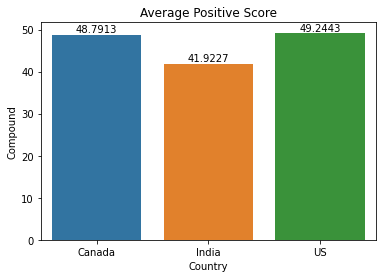

In [249]:
# use sns barplot to plot bar plot
# between Country and Sentiment value
ax = sns.barplot(x = x_pos.index, y = x_pos["Compound"],
                 data = x_pos)

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

ax.set_title("Average Positive Score")


In [250]:
x_neg = negi.groupby("Country")[["Compound"]].mean()*100
x_neg

Compound
Country          
Canada   -34.3580
India    -49.5050
US       -46.0705

Text(0.5, 1.0, 'Average Negative Score')

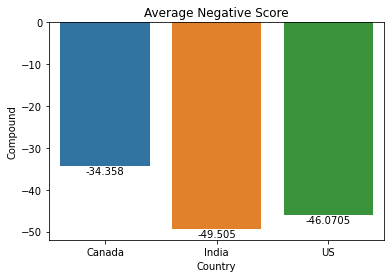

In [251]:
# use sns barplot to plot bar plot
# between Country and Sentiment value
ax = sns.barplot(x = x_neg.index, y = x_neg["Compound"],
                 data = x_neg)

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

ax.set_title("Average Negative Score")

In [252]:
df_all = df.groupby(["Country", "Opinion"])[["Opinion_Weight"]].count()
df_all

Opinion_Weight
Country Opinion                 
Canada  Negative               5
        Neutral               12
        Positive               8
India   Negative               2
        Neutral                5
        Positive              15
US      Negative              20
        Neutral               34
        Positive              42

Text(0.5, 1.0, 'Count of Opinions in different Country')

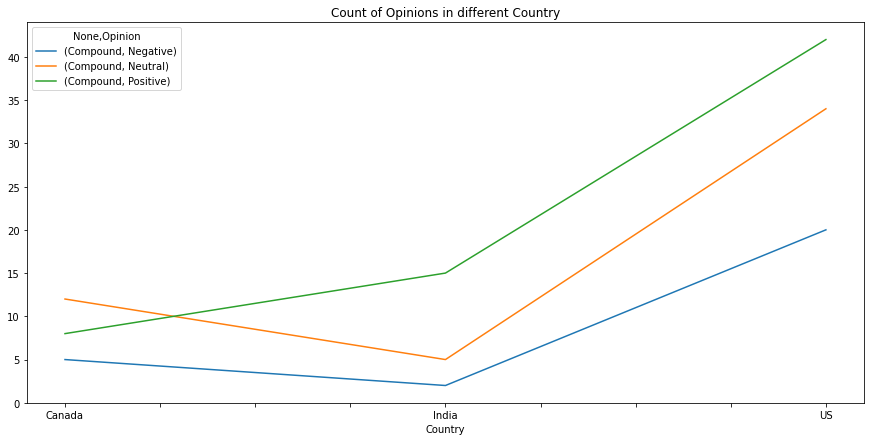

In [253]:
#ax = sns.barplot(x = df_all.index, y = df_all["Opinion_Weight"],
#                 data = df_all)
#ax.bar_label(ax.containers[0])

fig, ax = plt.subplots(figsize=(15,7))
df.groupby(["Country", "Opinion"])[["Compound"]].count().unstack().plot(ax=ax)


ax.set_title("Count of Opinions in different Country")

# Word Cloud

A word cloud (also known as a tag cloud) is a visual representation of words. 

Cloud creators are used to highlight popular words and phrases based on frequency and relevance. 

They provide you with quick and simple visual insights that can lead to more in-depth analyses.

In [254]:
from wordcloud import WordCloud 

# Positive Word Cloud

In [255]:
#df['Lemma'] [df['Country']=='India']

# Positive WordCloud Country: India

In [256]:
all_words_positive = ' '.join(text for text in df['Lemma'][df['Country']=='India'][df['Compound'] > 0])

In [257]:
wc_positive = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_positive)

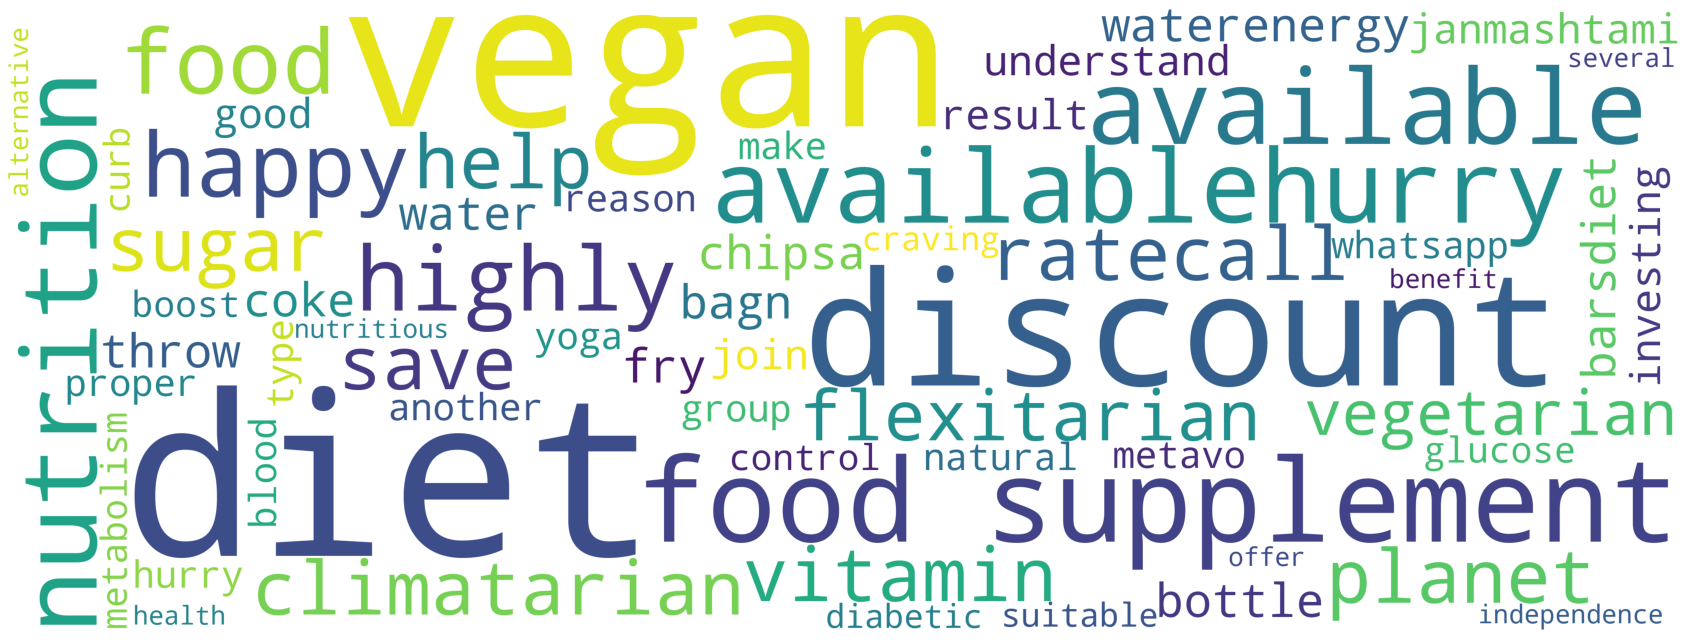

In [258]:
plt.figure(figsize=(30,30))
plt.imshow(wc_positive)
plt.axis('off')
#plt.title('Positive Wordcloud for Country India')
plt.show()

# Positive WordCloud Country: Canada

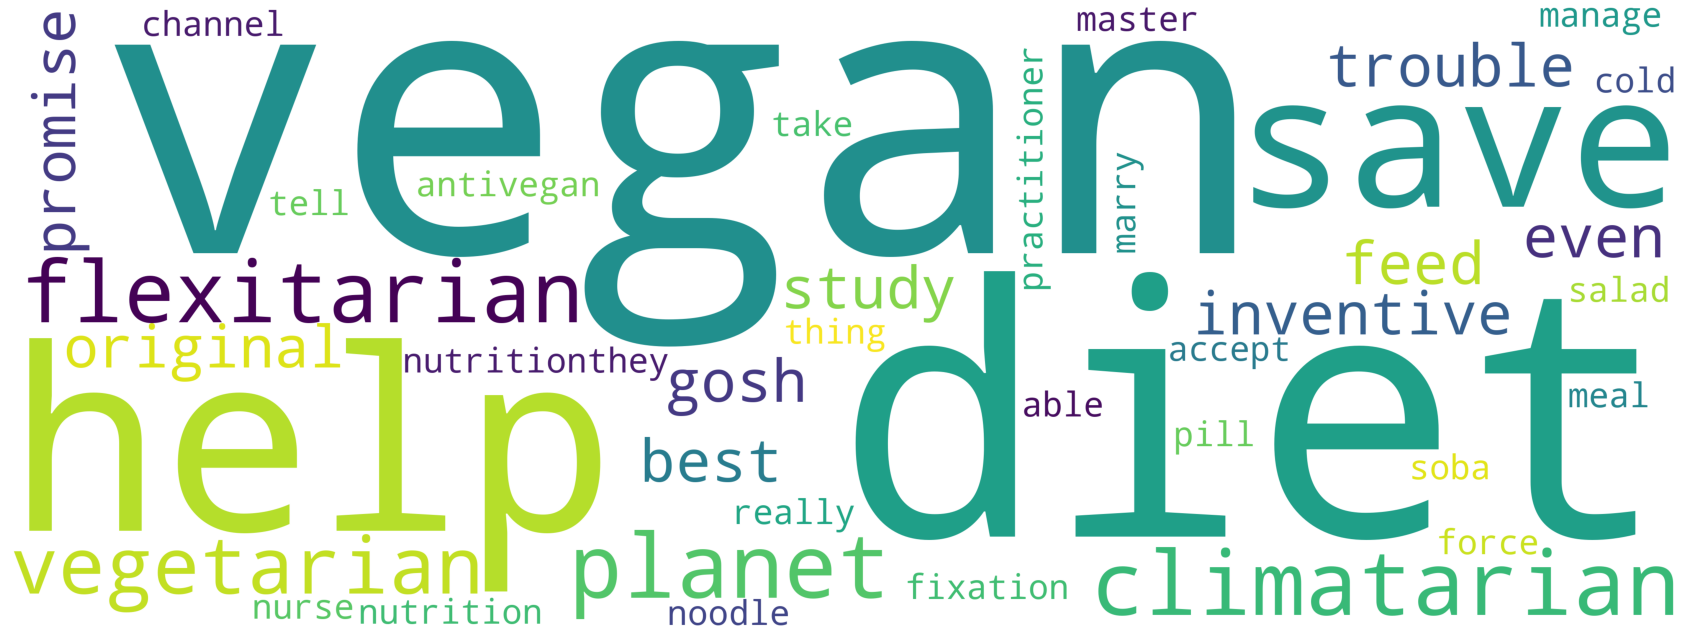

In [259]:
all_words_positive = ' '.join(text for text in df['Lemma'][df['Country']=='Canada'][df['Compound'] > 0])

wc_positive = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_positive)

plt.figure(figsize=(30,30))
plt.imshow(wc_positive)
plt.axis('off')
#plt.title('Positive Wordcloud for Country Canada')
plt.show()

# Positive WordCloud Country: US

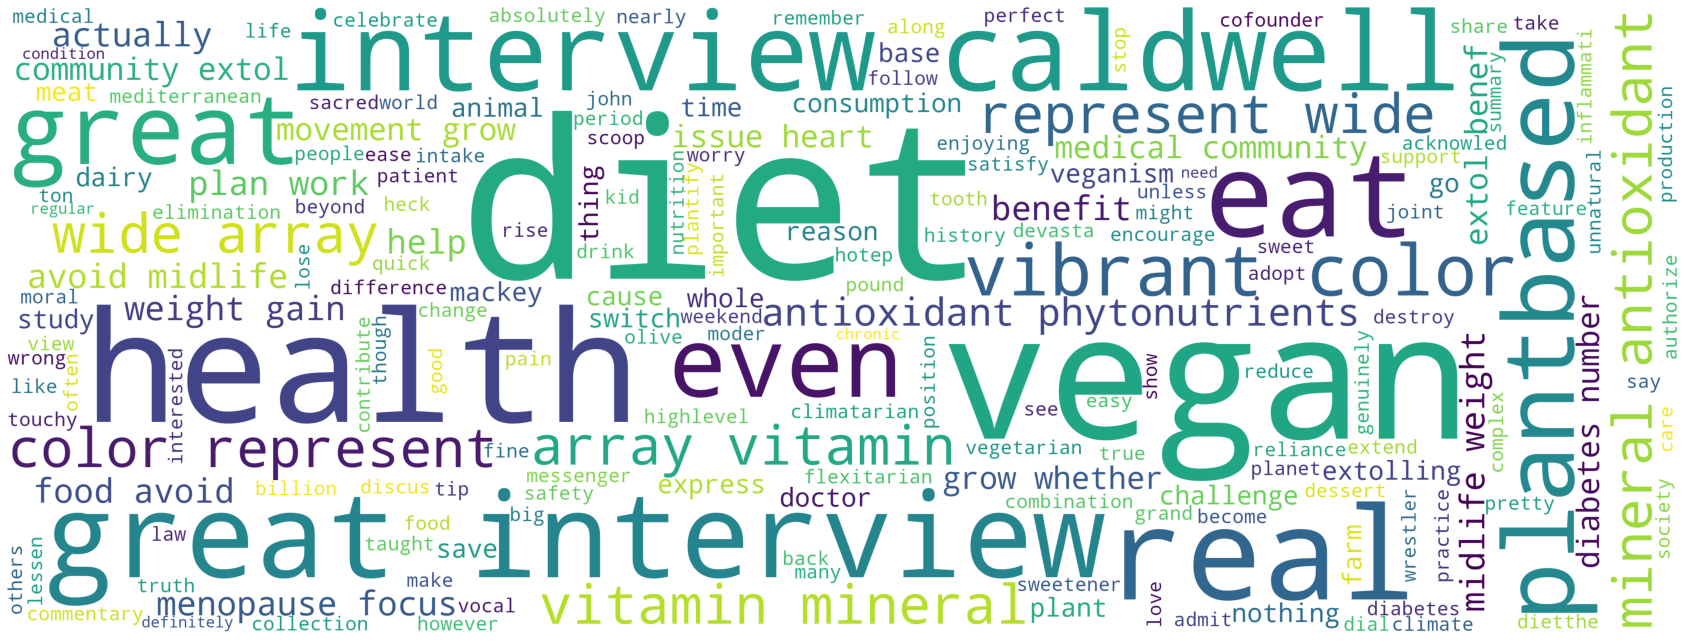

In [260]:
all_words_positive = ' '.join(text for text in df['Lemma'][df['Country']=='US'][df['Compound'] > 0])

wc_positive = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_positive)

plt.figure(figsize=(30,30))
plt.imshow(wc_positive)
plt.axis('off')
#plt.title('Positive Wordcloud for Country US')
plt.show()

# Negative Word Cloud

# Negative WordCloud Country: India

In [261]:
all_words_negative = ' '.join(text for text in df['Lemma'][df['Country']=='India'][df['Compound'] < 0]) 

In [262]:
wc_negative = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_negative)

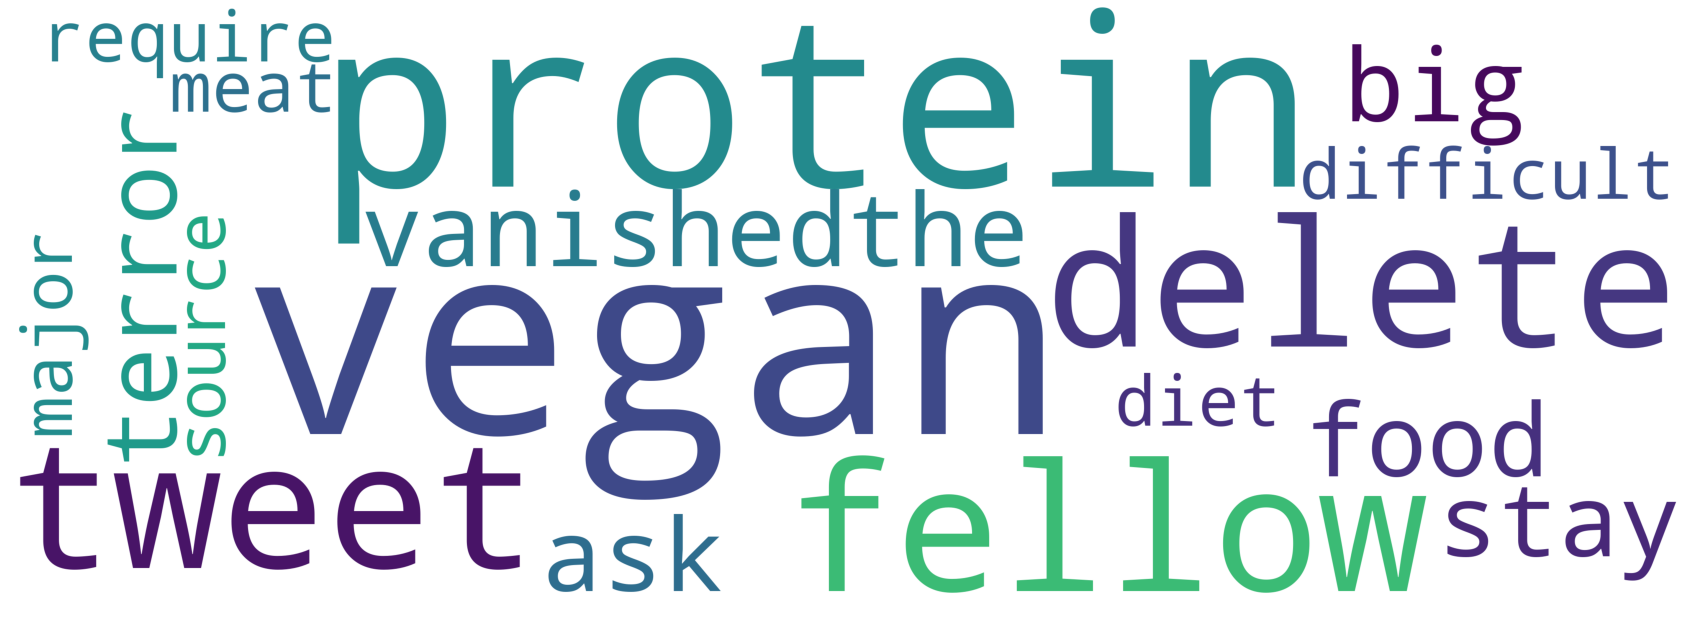

In [263]:
plt.figure(figsize=(30,30))
plt.imshow(wc_negative)
plt.axis('off')
#plt.title('Negative Wordcloud for Country India')
plt.show()

# Negative WordCloud Country: Canada

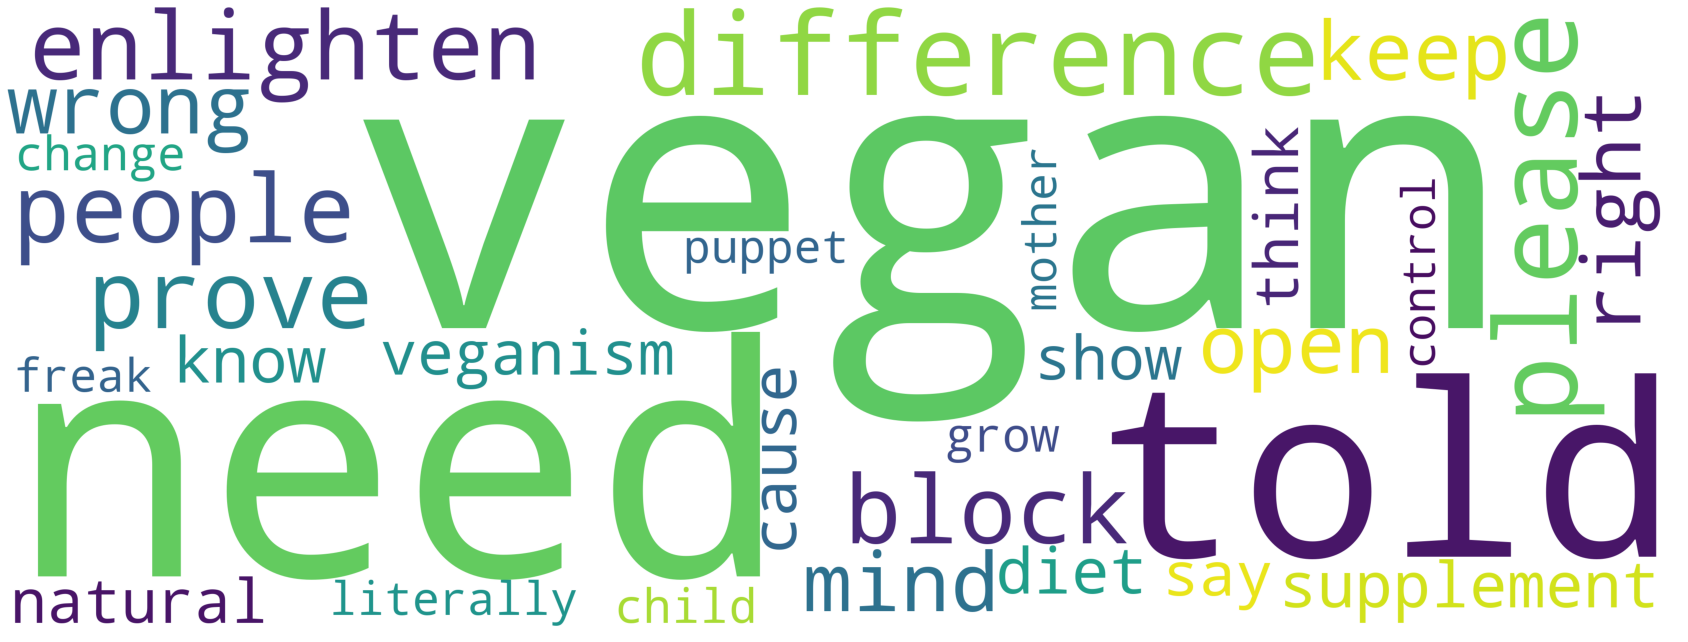

In [264]:
all_words_negative = ' '.join(text for text in df['Lemma'][df['Country']=='Canada'][df['Compound'] < 0]) 

wc_negative = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_negative)

plt.figure(figsize=(30,30))
plt.imshow(wc_negative)
plt.axis('off')
#plt.title('Negative Wordcloud for Country Canada')
plt.show()

# Negative WordCloud Country: US

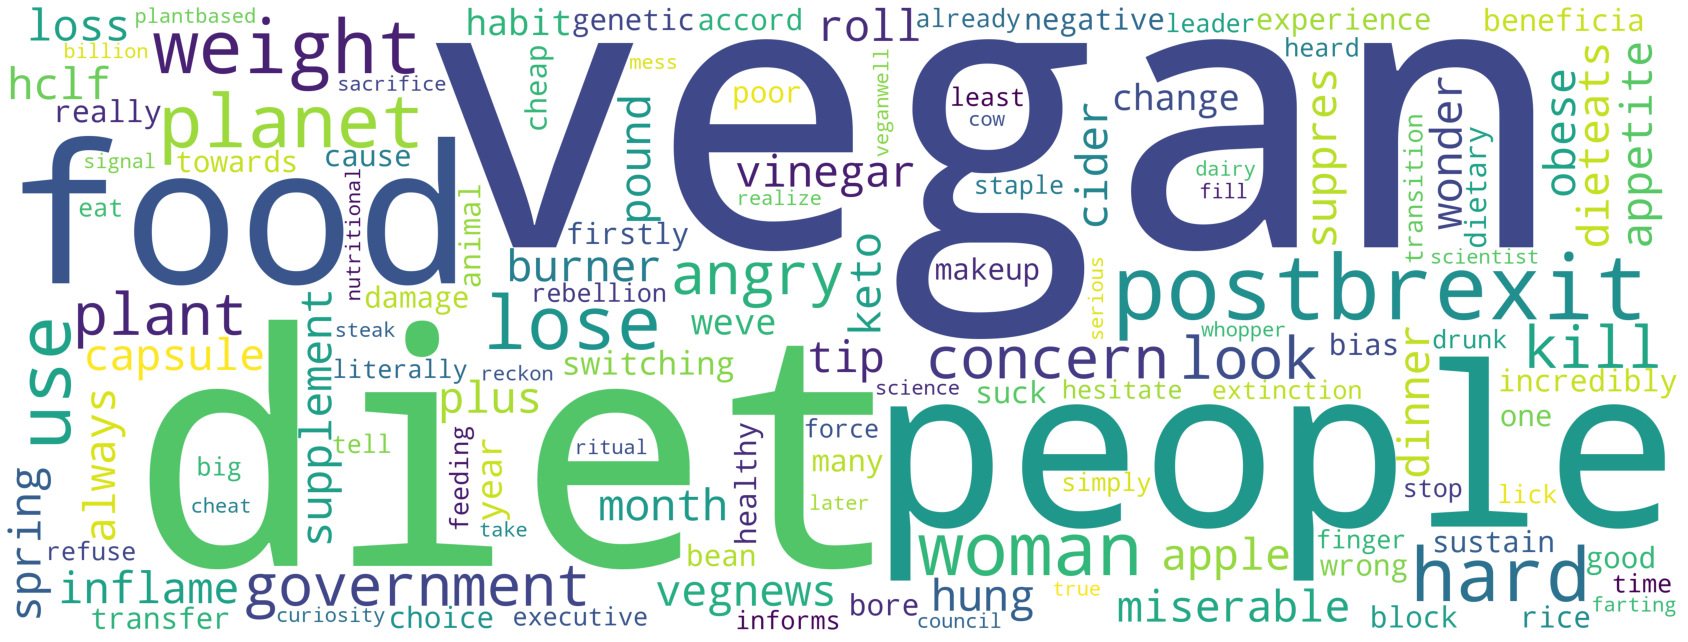

In [265]:
all_words_negative = ' '.join(text for text in df['Lemma'][df['Country']=='US'][df['Compound'] < 0]) 

wc_negative = WordCloud(stopwords = stop_word, background_color='white', height=1500, width=4000).generate(all_words_negative)

plt.figure(figsize=(30,30))
plt.imshow(wc_negative)
plt.axis('off')
#plt.title('Negative Wordcloud for Country US')
plt.show()

# TF - IDF (Term Frequency - Inverse Document Frequency)

# It is a method of extracting the features from the text data.


# Used to find related content and important words and phrase in a larger text.


# 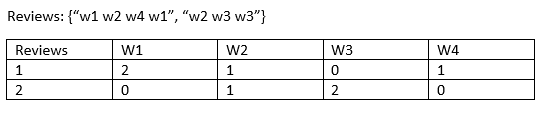

# ![TF](TF.png)

![IDF_sam](IDF_sam.png)

# Term Frequency - Words that are frequently occurring in a document(Word count)., how often does a word ‘w’ occur in a document ‘d’. 

# It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.


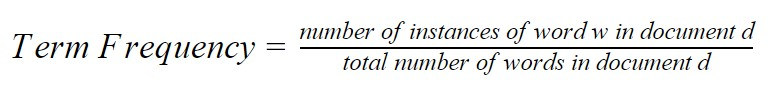

# Inverse Document Frequency

# Used to calculate the weight of rare words across all documents in the corpus.

# The words that occur rarely in the corpus have a high IDF score


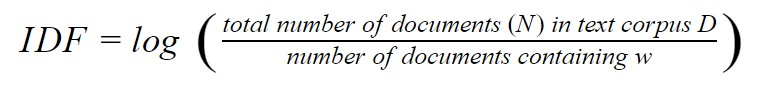

In [266]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [267]:
tw = df["Lemma"]

In [268]:
vectorizer = TfidfVectorizer()

In [269]:
Lemma = vectorizer.fit_transform(tw)

In [270]:
Lemma.shape

(143, 540)

In [271]:
df1 = pd.DataFrame(Lemma.todense(), columns=vectorizer.get_feature_names()) 
# todense() will return the matrix.

C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [272]:
df1

able  absolutely  accept    accord   achieve  acknowled  activism  \
0    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
1    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
2    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
3    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
4    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
5    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
6    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
7    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
8    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
9    0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
10   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
11   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
12   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
13   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
14   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
15   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
16   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
17   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
18   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
19   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
20   0.346179    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
21   0.000000    0.000000  0.5095  0.000000  0.000000    0.00000  0.000000   
22   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
23   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
24   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
25   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
26   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
27   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
28   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
29   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
30   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
31   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
32   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
33   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
34   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
35   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
36   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
37   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
38   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
39   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
40   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
41   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
42   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
43   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
44   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
45   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
46   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
47   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
48   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
49   0.000000    0.000000  0.0000  0.000000  0.000000    0.00000  0.000000   
50   0.000000    0.000000  0.00

# Split the Dataset for TF-IDF DataFrame

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
x_train, x_test, y_train, y_test = train_test_split(Lemma, df['Opinion_Weight'], 
                                                    test_size = 0.3, random_state = 7)

In [275]:
x_train.shape

(100, 540)

In [276]:
x_test.shape

(43, 540)

In [277]:
y_train.shape

(100,)

In [278]:
y_test.shape

(43,)

# SVC(Support Vector Machine)

In [279]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [280]:
svc_model = SVC()

In [281]:
svc_model.fit(x_train, y_train)

SVC()

In [282]:
svc_pred = svc_model.predict(x_test)

In [283]:
#svc_pred

In [284]:
svc_accuracy = accuracy_score(y_test, svc_pred) *100

In [285]:
svc_accuracy

55.81395348837209

In [286]:
#print("Confusion Matrix: \n", confusion_matrix(y_test, svc_pred))
#cm=confusion_matrix(y_test, svc_pred)

cm=confusion_matrix(y_true=y_test, y_pred=svc_pred)

Text(33.0, 0.5, 'Actual')

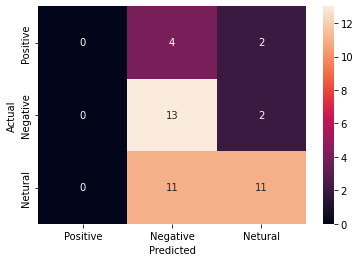

In [287]:
sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ![Confusion](Confusion.png)

In [288]:
print("Classification Report: \n\n", classification_report(y_test, svc_pred))


Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         6
         0.0       0.46      0.87      0.60        15
         1.0       0.73      0.50      0.59        22

    accuracy                           0.56        43
   macro avg       0.40      0.46      0.40        43
weighted avg       0.54      0.56      0.52        43



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [289]:
# Precision: Positive Response : 67% of opinions that the model predicted.
#            Neutral Response: 100% of opinions that the model predicted.
#            Negative Response: 0% of opinions that the model predicted


# Recall: Positive Response: The model only predicted this outcome correctly for 100% of those opinions.
#         Neutral Response: The model only predicted this outcome correctly for 21% of those opinions.
#         Negative Response: The model only predicted this outcome correctly for 0% of those opinions.


# F1 Score: Positive Response: Since this value is very close to 1, it tells us that the model does a poor job of prediction.
#           Neutral Response: Since this value isn’t very close to 1, it tells us that the model does a poor job of prediction.
#           Negative Response: Since this value is 0, it tells us that the model does a poor job of prediction.

# KNN

In [290]:
from sklearn.neighbors import KNeighborsClassifier

In [291]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [292]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [293]:
knn_pred = knn.predict(x_test)

In [294]:
#knn_pred

In [295]:
knn_accuracy = accuracy_score(y_test, knn_pred) *100

In [296]:
knn_accuracy

51.162790697674424

In [297]:
#print("Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
cm = confusion_matrix(y_test, knn_pred)

Text(33.0, 0.5, 'Actual')

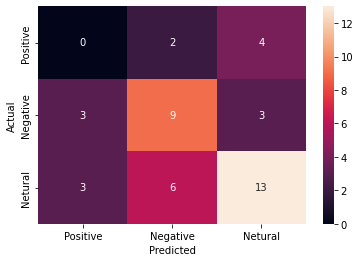

In [298]:
sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [299]:
print("Classification Report: \n\n", classification_report(y_test, knn_pred))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         6
         0.0       0.53      0.60      0.56        15
         1.0       0.65      0.59      0.62        22

    accuracy                           0.51        43
   macro avg       0.39      0.40      0.39        43
weighted avg       0.52      0.51      0.51        43



# Random Forest

In [300]:
from sklearn.ensemble import RandomForestClassifier

In [301]:
rnd = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=50)
# n_estimators = the number of decision trees to use.

In [302]:
rnd

RandomForestClassifier(max_leaf_nodes=16, random_state=50)

In [303]:
rnd.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, random_state=50)

In [304]:
rnd_pred = rnd.predict(x_test)

In [305]:
#rnd_pred

In [306]:
rnd_accuracy = accuracy_score(y_test, rnd_pred) *100

In [307]:
rnd_accuracy

69.76744186046511

In [308]:
cm=confusion_matrix(y_true=y_test, y_pred=rnd_pred)

Text(33.0, 0.5, 'Actual')

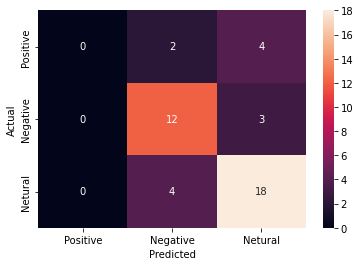

In [309]:
sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [310]:
print("Classification Report: \n\n", classification_report(y_test, rnd_pred))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         6
         0.0       0.67      0.80      0.73        15
         1.0       0.72      0.82      0.77        22

    accuracy                           0.70        43
   macro avg       0.46      0.54      0.50        43
weighted avg       0.60      0.70      0.65        43



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Classifier

In [311]:
from sklearn import model_selection, naive_bayes

In [312]:
Naive = naive_bayes.MultinomialNB()

In [313]:
Naive.fit(x_train, y_train)

MultinomialNB()

In [314]:
nb_pred = Naive.predict(x_test)

In [315]:
nb_accuracy = accuracy_score(nb_pred, y_test)*100

In [316]:
nb_accuracy

72.09302325581395

In [317]:
#print("Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
cm = confusion_matrix(y_true=y_test, y_pred=nb_pred)

Text(33.0, 0.5, 'Actual')

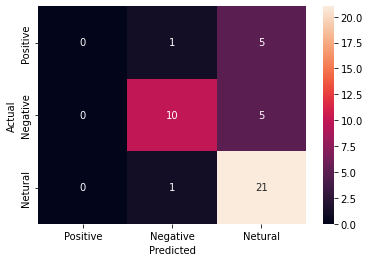

In [318]:
sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [319]:
print("Classification Report: \n\n", classification_report(y_test, rnd_pred))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         6
         0.0       0.67      0.80      0.73        15
         1.0       0.72      0.82      0.77        22

    accuracy                           0.70        43
   macro avg       0.46      0.54      0.50        43
weighted avg       0.60      0.70      0.65        43



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparison of different models for TF-IDF

In [320]:
all_algo = ['SVC', 'KNN','Random Forest', 'Naive Bayes']

In [321]:
all_accuracy = [svc_accuracy, knn_accuracy, rnd_accuracy, nb_accuracy]

In [322]:
all_compare = pd.DataFrame({'Models' : all_algo, 'Accuracy' : all_accuracy}, index = [i for i in range(1, 5)])

In [323]:
all_compare.T

1          2              3            4
Models          SVC        KNN  Random Forest  Naive Bayes
Accuracy  55.813953  51.162791      69.767442    72.093023

In [324]:
all_compare.style.bar(subset=['Accuracy'], color='#bfe8ae')

In [325]:
import seaborn as sns

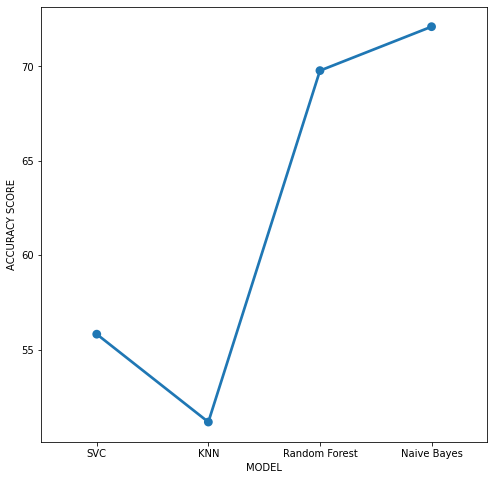

In [326]:
plt.figure(figsize = (8, 8))
sns.pointplot(x = all_compare["Models"], y = all_compare["Accuracy"], data = all_compare)
plt.xlabel('MODEL')
plt.ylabel('ACCURACY SCORE')
plt.show()

# Count Vectorizer

In [327]:
countVectorizer = CountVectorizer()

countVectorizer.fit(tw)

cvec_counts = countVectorizer.transform(tw)


In [328]:
df2 = pd.DataFrame(cvec_counts.todense(), columns=vectorizer.get_feature_names())
# todense() will return the matrix.
print(df2)

C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     able  absolutely  accept  accord  achieve  acknowled  activism  actually  \
0       0           0       0       0        0          0         0         0   
1       0           0       0       0        0          0         0         0   
2       0           0       0       0        0          0         0         0   
3       0           0       0       0        0          0         0         0   
4       0           0       0       0        0          0         0         0   
5       0           0       0       0        0          0         0         0   
6       0           0       0       0        0          0         0         0   
7       0           0       0       0        0          0         0         0   
8       0           0       0       0        0          0         0         0   
9       0           0       0       0        0          0         0         0   
10      0           0       0       0        0          0         0         0   
11      0           0       

# Split the Dataset for Count Vectorizer DataFrame

In [329]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(cvec_counts, df['Opinion_Weight'], 
                                                    test_size = 0.3, random_state = 7)

In [330]:
x_train_c.shape

(100, 540)

In [331]:
y_train_c.shape

(100,)

In [332]:
x_test_c.shape

(43, 540)

In [333]:
y_test_c.shape

(43,)

# KNN

In [334]:
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(x_train_c, y_train_c)

knn_pred_c = knn.predict(x_test_c)

#knn_pred

knn_accuracy_c = accuracy_score(y_test_c, knn_pred_c) *100

knn_accuracy_c

41.86046511627907

Text(33.0, 0.5, 'Actual')

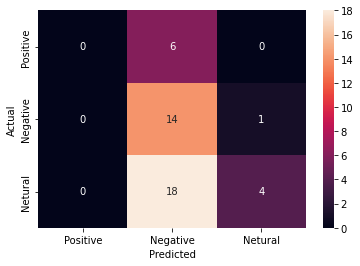

In [335]:
cm=confusion_matrix(y_true=y_test, y_pred=knn_pred_c)

sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [336]:
print("Classification Report: \n\n", classification_report(y_test, knn_pred_c))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         6
         0.0       0.37      0.93      0.53        15
         1.0       0.80      0.18      0.30        22

    accuracy                           0.42        43
   macro avg       0.39      0.37      0.27        43
weighted avg       0.54      0.42      0.34        43



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [337]:
svc_model = SVC()

svc_model.fit(x_train_c, y_train_c)

svc_pred_c = svc_model.predict(x_test_c)

#svc_pred

svc_accuracy_c = accuracy_score(y_test_c, svc_pred_c) *100

svc_accuracy_c

69.76744186046511

Text(33.0, 0.5, 'Actual')

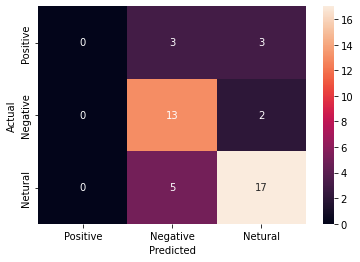

In [338]:
cm=confusion_matrix(y_true=y_test, y_pred=svc_pred_c)


sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [339]:
print("Classification Report: \n\n", classification_report(y_test, svc_pred_c))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         6
         0.0       0.62      0.87      0.72        15
         1.0       0.77      0.77      0.77        22

    accuracy                           0.70        43
   macro avg       0.46      0.55      0.50        43
weighted avg       0.61      0.70      0.65        43



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [340]:
rnd = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=50)
# n_estimatores = the number of decision trees to use.

rnd

rnd.fit(x_train_c, y_train_c)

rnd_pred_c = rnd.predict(x_test_c)

#rnd_pred

rnd_accuracy_c = accuracy_score(y_test_c, rnd_pred_c) *100

rnd_accuracy_c

60.46511627906976

Text(33.0, 0.5, 'Actual')

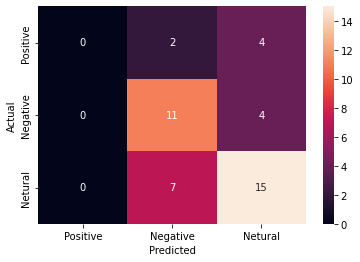

In [341]:
cm=confusion_matrix(y_true=y_test, y_pred=rnd_pred_c)


sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [342]:
print("Classification Report: \n\n", classification_report(y_test, rnd_pred_c))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         6
         0.0       0.55      0.73      0.63        15
         1.0       0.65      0.68      0.67        22

    accuracy                           0.60        43
   macro avg       0.40      0.47      0.43        43
weighted avg       0.53      0.60      0.56        43



C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

In [343]:
Naive = naive_bayes.MultinomialNB()

Naive.fit(x_train_c, y_train_c)

nb_pred_c = Naive.predict(x_test_c)

nb_accuracy_c = accuracy_score(nb_pred_c, y_test_c)*100

nb_accuracy_c

53.48837209302325

Text(33.0, 0.5, 'Actual')

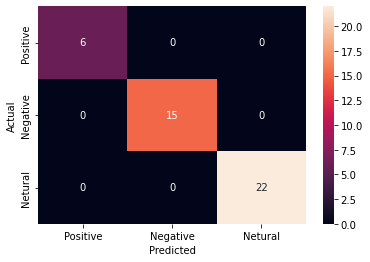

In [344]:
cm=confusion_matrix(y_true=y_test, y_pred=y_test_c)

sns.heatmap(cm, annot=True, xticklabels = ['Positive', 'Negative', 'Netural'], 
            yticklabels = ['Positive', 'Negative', 'Netural'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [345]:
print("Classification Report: \n\n", classification_report(y_test, y_test_c))

Classification Report: 

               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         6
         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



# Comparison of different models for CountVectorizer

In [346]:
all_algo_c = ['SVC', 'KNN','Random Forest', 'Naive Bayes']

all_accuracy_c = [svc_accuracy_c, knn_accuracy_c, rnd_accuracy_c, nb_accuracy_c]

all_compare_c = pd.DataFrame({'Models' : all_algo_c, 'Accuracy' : all_accuracy_c}, index = [i for i in range(1, 5)])

all_compare_c.T

all_compare_c.style.bar(subset=['Accuracy'], color='#bfe8ae')

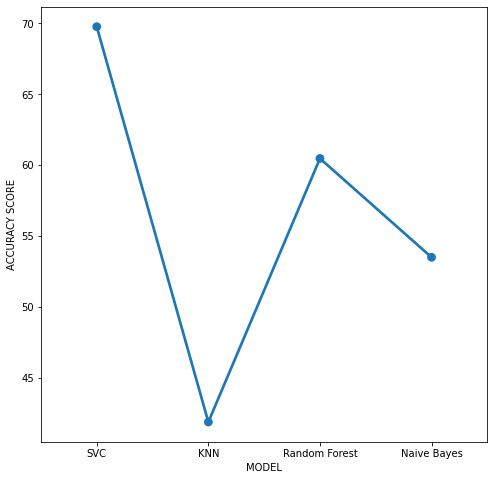

In [347]:
plt.figure(figsize = (8, 8))
sns.pointplot(x = all_compare_c["Models"], y = all_compare_c["Accuracy"], data = all_compare)
plt.xlabel('MODEL')
plt.ylabel('ACCURACY SCORE')
plt.show()

# Comaprison of TF-IDF and CountVector

In [348]:
all_algo = ['SVC', 'KNN','Random Forest', 'Naive Bayes']

all_accuracy = [svc_accuracy, knn_accuracy, rnd_accuracy, nb_accuracy]
all_accuracy_c = [svc_accuracy_c, knn_accuracy_c, rnd_accuracy_c, nb_accuracy_c]

In [349]:
all_compare = pd.DataFrame({'Models' : all_algo, 'TF-IDF Accuracy' : all_accuracy, 
                            'Count Vectorizer Accuracy' : all_accuracy_c},
                           index = [i for i in range(1, 5)])

all_compare

Models  TF-IDF Accuracy  Count Vectorizer Accuracy
1            SVC        55.813953                  69.767442
2            KNN        51.162791                  41.860465
3  Random Forest        69.767442                  60.465116
4    Naive Bayes        72.093023                  53.488372

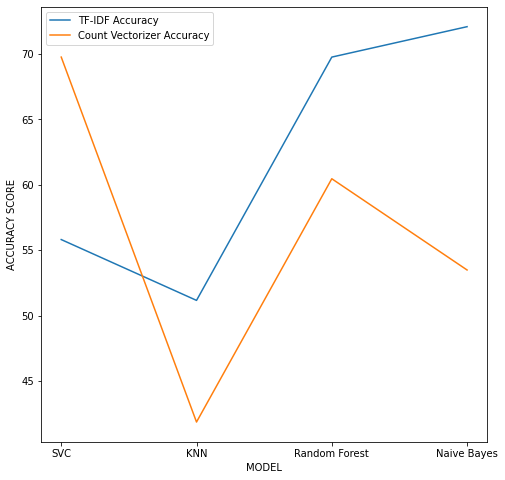

In [350]:
plt.figure(figsize = (8, 8))
plt.plot(all_compare["Models"], all_compare["TF-IDF Accuracy"],label='TF-IDF Accuracy')
plt.plot(all_compare["Models"], all_compare["Count Vectorizer Accuracy"],label='Count Vectorizer Accuracy')
plt.xlabel('MODEL')
plt.ylabel('ACCURACY SCORE')
plt.legend()
plt.show()